In [1]:
import tensorflow as tf
import utils_img_rec as ut
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import pathlib

### Definindo variaveis

In [2]:
DATA_DIR  = '../bases/pickle/imagens/cifar10/cifar10-test-pickle.pickle'
TEST2_DIR = '../bases/dados/imagens/teste2/CIFAR10-amostra-3'

#DATA_DIR  = '../bases/pickle/imagens/mnist/mnist-test-pickle.pickle'
#TEST2_DIR = '../bases/dados/imagens/teste2/amostra-numerica'

formato = 'jpg'
IMG_SIZE = 32
numero_de_canais = 3

#DATA_DIR = pathlib.Path(DATA_DIR)
#TEST2_DIR = pathlib.Path(TEST2_DIR)

pickle_in = open(DATA_DIR,"rb")
data_train = pickle.load(pickle_in)

model = tf.keras.models.load_model('../modelos_salvos/tensorflow/modelo_cifar10 - acc = 0.6366.h5')

#model = tf.keras.models.load_model('../modelos_salvos/tensorflow/modelo.h5')

### Definindo categorias

In [3]:
#CATEGORIES = []
CATEGORIES = ut.get_classes(data_train)
CATEGORIES.sort()
try:
    CATEGORIES.remove('.ipynb_checkpoints')
except:
    pass
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Preparando dados

In [4]:
def prepare(filepath):
    if numero_de_canais == 1:
        img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    else:
        img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array, new_array.reshape(-1, IMG_SIZE, IMG_SIZE, numero_de_canais)

def plot_image(prediction_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
    predicted_label = np.argmax(prediction_array)        
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("Classe - {} | {:2.0f}% (true class {})".format(CATEGORIES[predicted_label], 100*np.max(prediction_array), CATEGORIES[true_label]), color=color)

def plot_value_array(prediction_array, true_label):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(len(CATEGORIES)), prediction_array, color= "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction_array)

    thisplot[predicted_label].set_color('red')
    print(CATEGORIES[true_label])
    thisplot[true_label].set_color('green')

airplane


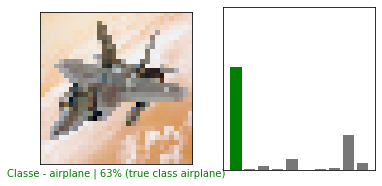

Classe - airplane | Confiança - 62.7 %
Classe - automobile | Confiança - 0.66 %
Classe - bird | Confiança - 2.45 %
Classe - cat | Confiança - 0.59 %
Classe - deer | Confiança - 6.67 %
Classe - dog | Confiança - 0.15 %
Classe - frog | Confiança - 0.22 %
Classe - horse | Confiança - 1.08 %
Classe - ship | Confiança - 21.26 %
Classe - truck | Confiança - 4.21 %
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
Total params: 24,704
Trainable params: 24,704
Non-trainable params: 0
_________________________________________________________________
Ativação na 1° camada


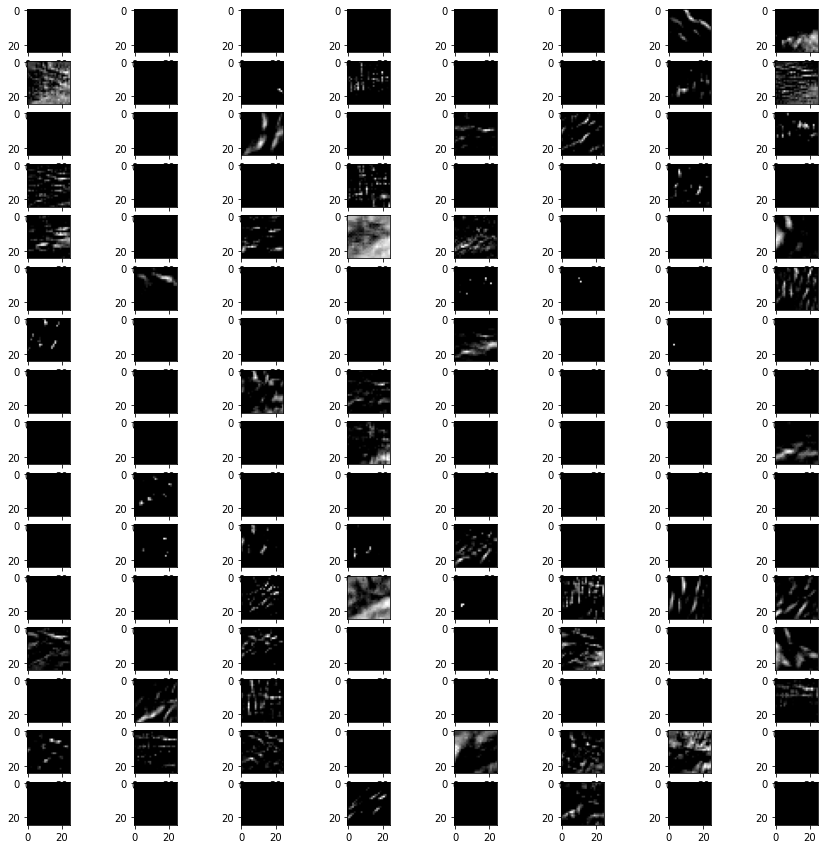

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
Total params: 155,840
Trainable params: 155,840
Non-trainable params: 0
_________________________________________________________________
Ativação na 4° camada


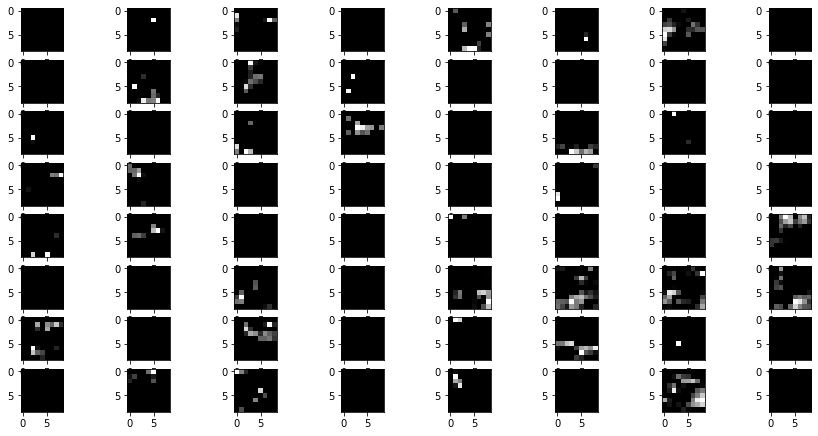

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0   

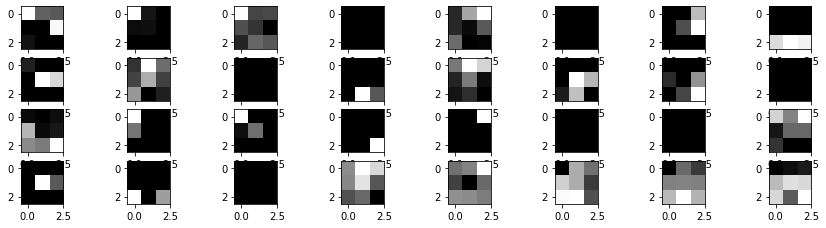





automobile


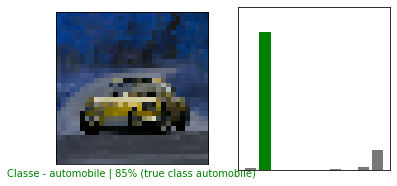

Classe - airplane | Confiança - 1.01 %
Classe - automobile | Confiança - 84.51 %
Classe - bird | Confiança - 0.04 %
Classe - cat | Confiança - 0.04 %
Classe - deer | Confiança - 0.01 %
Classe - dog | Confiança - 0.02 %
Classe - frog | Confiança - 0.26 %
Classe - horse | Confiança - 0.02 %
Classe - ship | Confiança - 1.96 %
Classe - truck | Confiança - 12.13 %
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
Total params: 24,704
Trainable params: 24,704
Non-trainable params: 0
_________________________________________________________________
Ativação na 1° camada


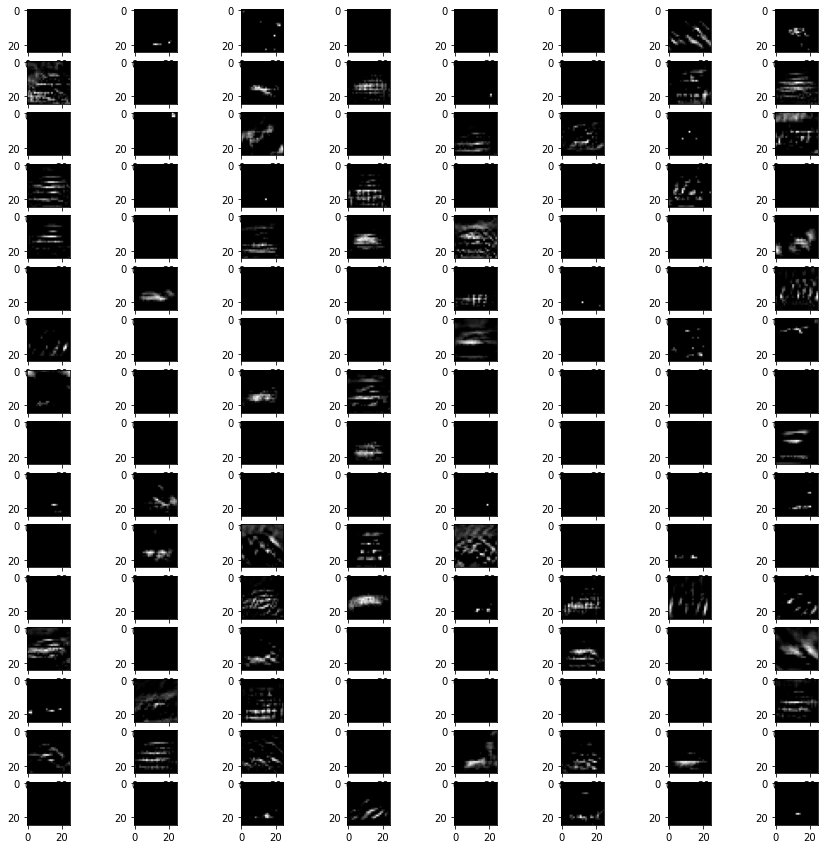

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
Total params: 155,840
Trainable params: 155,840
Non-trainable params: 0
_________________________________________________________________
Ativação na 4° camada


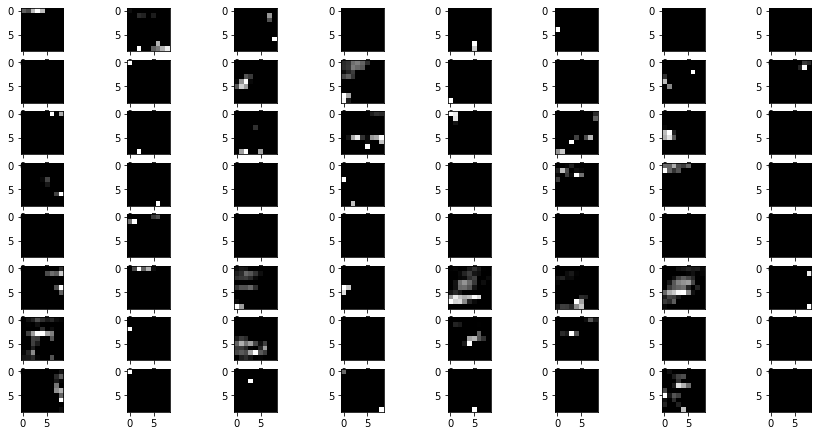

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0   

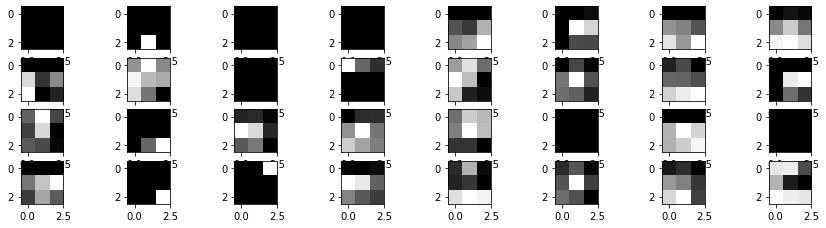





bird


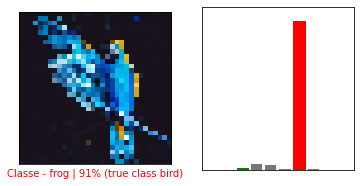

Classe - airplane | Confiança - 0.07 %
Classe - automobile | Confiança - 0.09 %
Classe - bird | Confiança - 1.08 %
Classe - cat | Confiança - 3.24 %
Classe - deer | Confiança - 3.2 %
Classe - dog | Confiança - 0.57 %
Classe - frog | Confiança - 91.46 %
Classe - horse | Confiança - 0.18 %
Classe - ship | Confiança - 0.05 %
Classe - truck | Confiança - 0.07 %
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
Total params: 24,704
Trainable params: 24,704
Non-trainable params: 0
_________________________________________________________________
Ativação na 1° camada


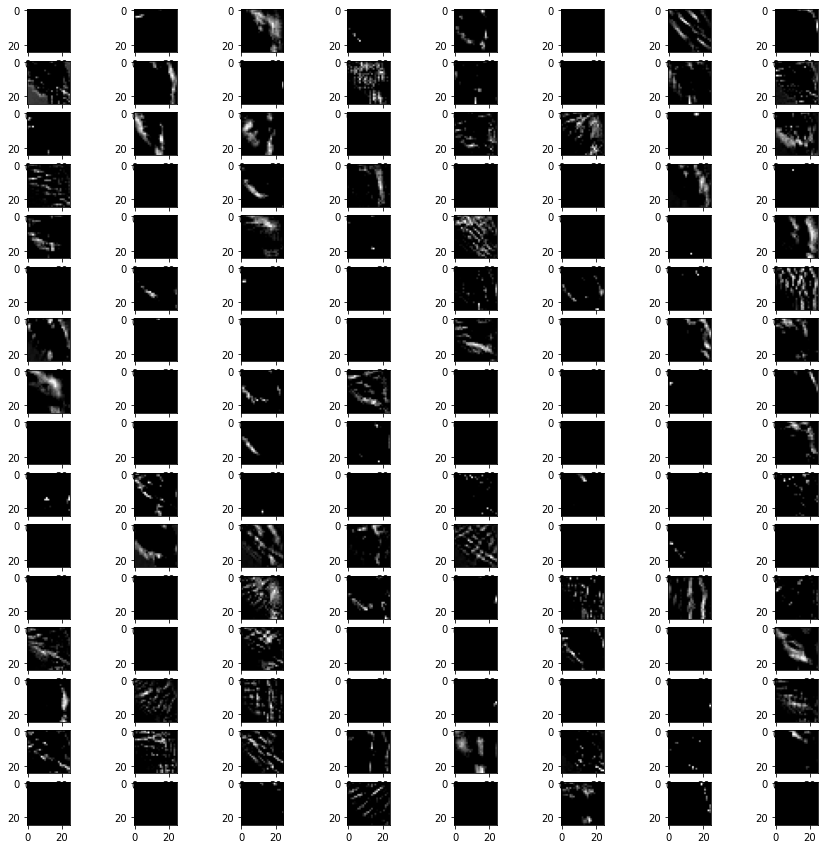

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
Total params: 155,840
Trainable params: 155,840
Non-trainable params: 0
_________________________________________________________________
Ativação na 4° camada


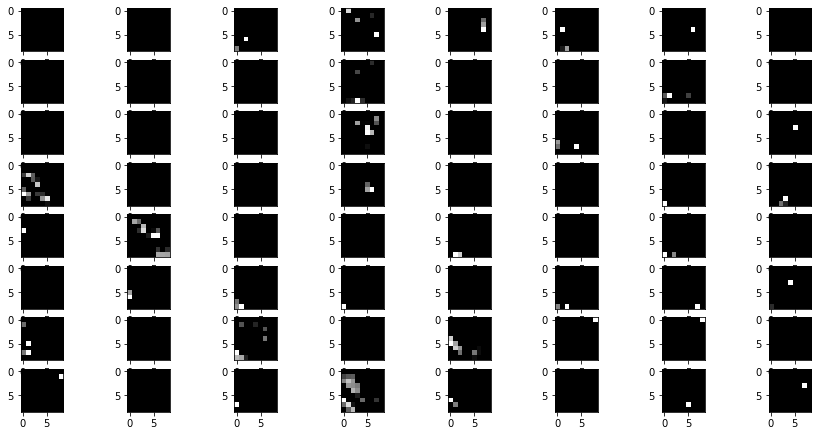

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0   

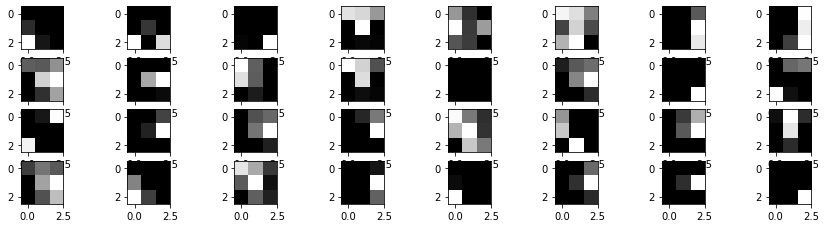





cat


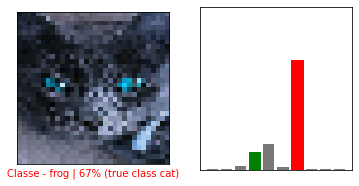

Classe - airplane | Confiança - 0.36 %
Classe - automobile | Confiança - 0.27 %
Classe - bird | Confiança - 2.47 %
Classe - cat | Confiança - 10.72 %
Classe - deer | Confiança - 15.76 %
Classe - dog | Confiança - 1.49 %
Classe - frog | Confiança - 67.33 %
Classe - horse | Confiança - 0.68 %
Classe - ship | Confiança - 0.59 %
Classe - truck | Confiança - 0.33 %
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
Total params: 24,704
Trainable params: 24,704
Non-trainable params: 0
_________________________________________________________________
Ativação na 1° camada


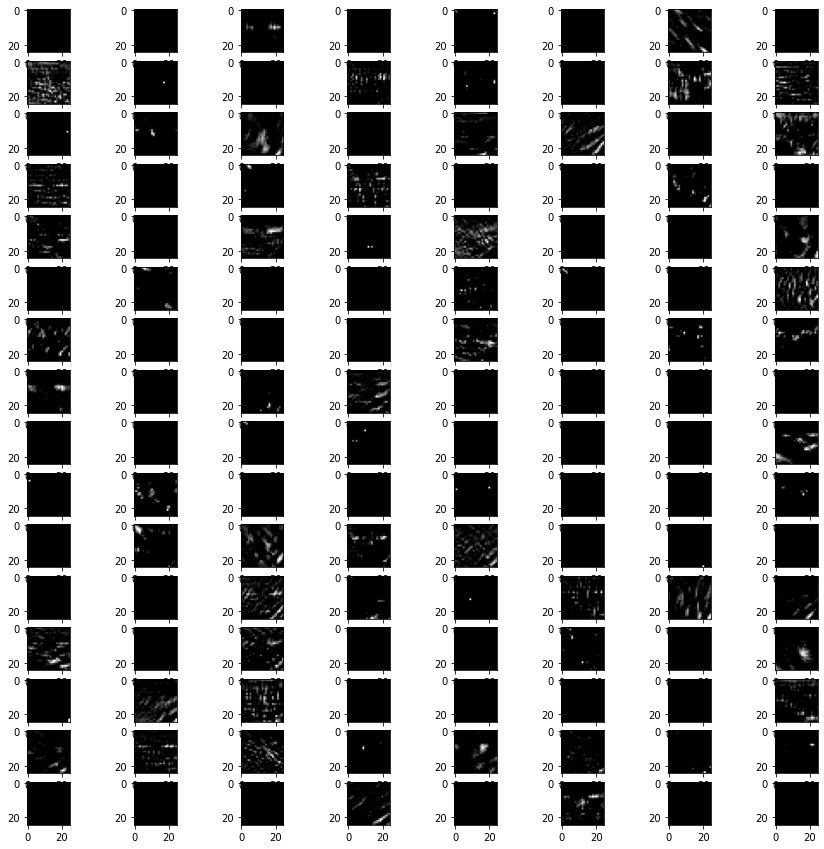

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
Total params: 155,840
Trainable params: 155,840
Non-trainable params: 0
_________________________________________________________________
Ativação na 4° camada


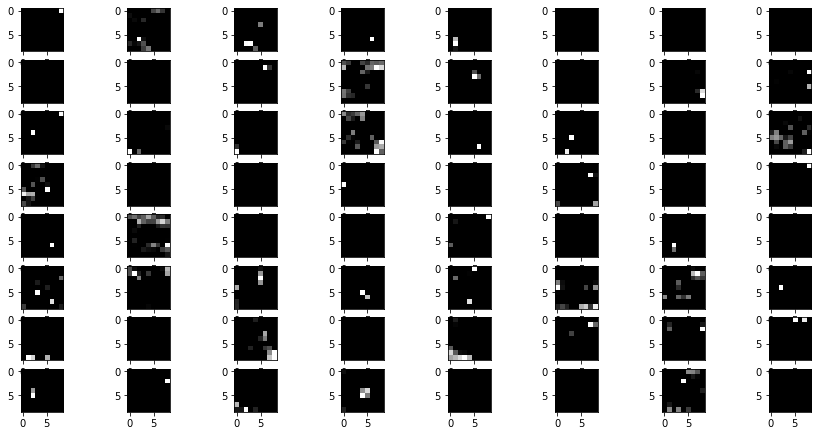

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0  

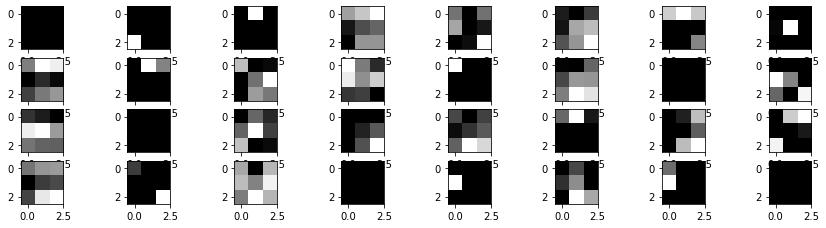





deer


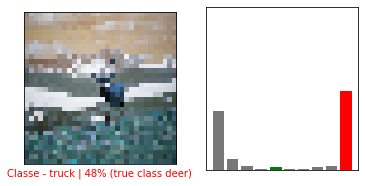

Classe - airplane | Confiança - 35.75 %
Classe - automobile | Confiança - 6.7 %
Classe - bird | Confiança - 2.12 %
Classe - cat | Confiança - 0.27 %
Classe - deer | Confiança - 1.7 %
Classe - dog | Confiança - 0.21 %
Classe - frog | Confiança - 0.37 %
Classe - horse | Confiança - 1.91 %
Classe - ship | Confiança - 2.59 %
Classe - truck | Confiança - 48.39 %
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
Total params: 24,704
Trainable params: 24,704
Non-trainable params: 0
_________________________________________________________________
Ativação na 1° camada


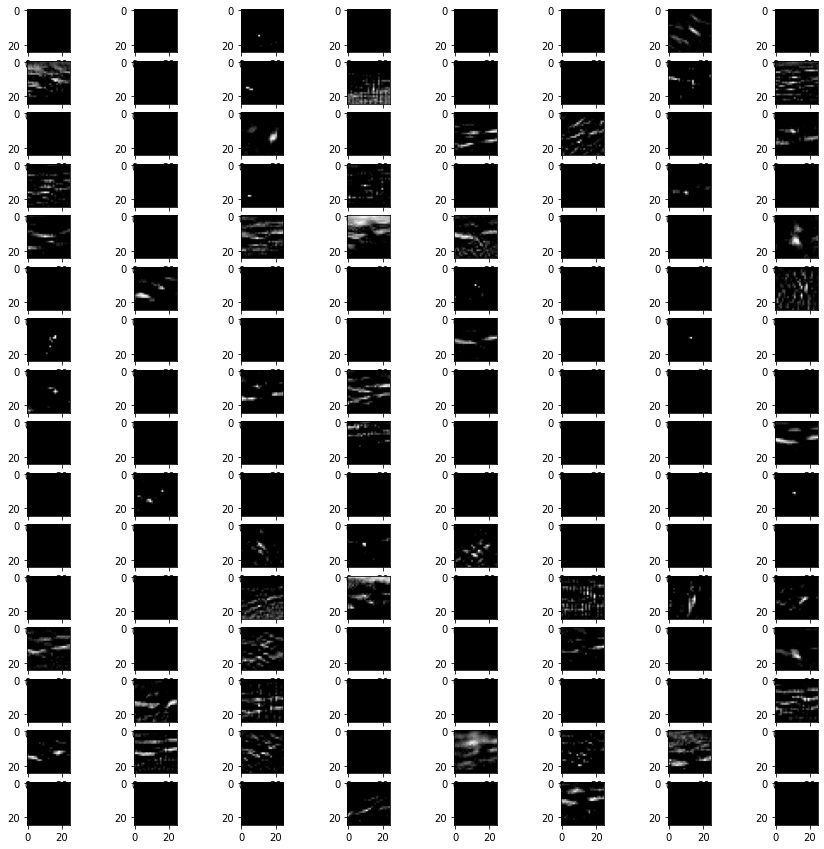

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
Total params: 155,840
Trainable params: 155,840
Non-trainable params: 0
_________________________________________________________________
Ativação na 4° camada


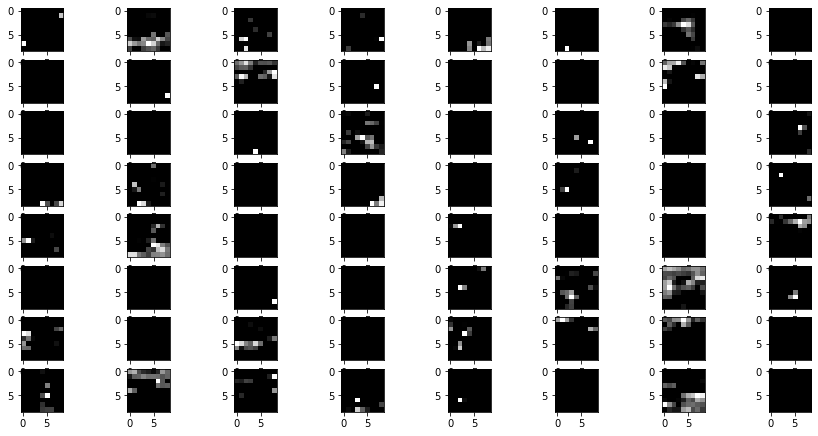

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0  

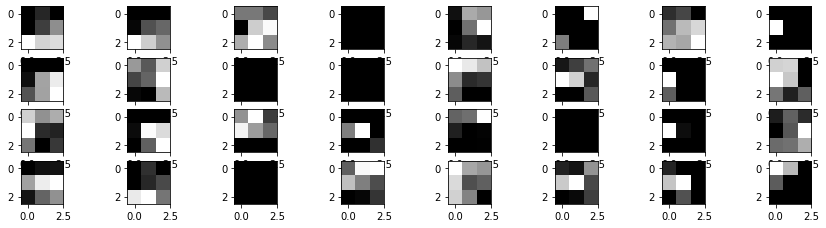





dog


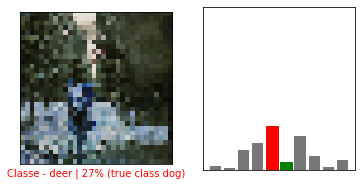

Classe - airplane | Confiança - 2.15 %
Classe - automobile | Confiança - 0.87 %
Classe - bird | Confiança - 12.1 %
Classe - cat | Confiança - 16.65 %
Classe - deer | Confiança - 27.11 %
Classe - dog | Confiança - 4.79 %
Classe - frog | Confiança - 20.73 %
Classe - horse | Confiança - 8.35 %
Classe - ship | Confiança - 1.56 %
Classe - truck | Confiança - 5.7 %
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
Total params: 24,704
Trainable params: 24,704
Non-trainable params: 0
_________________________________________________________________
Ativação na 1° camada


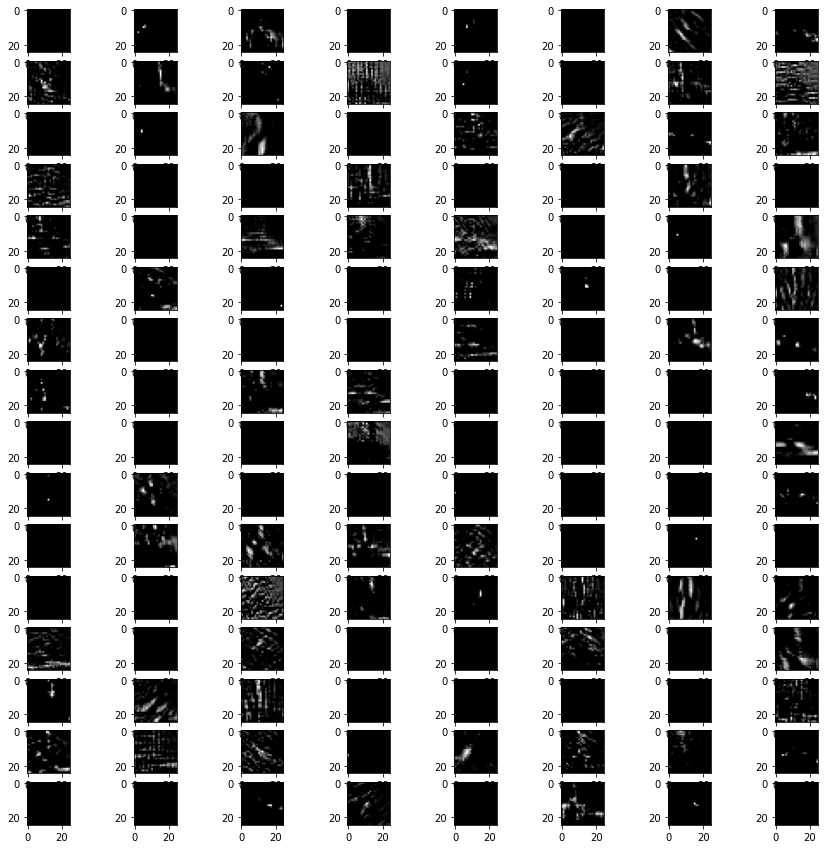

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
Total params: 155,840
Trainable params: 155,840
Non-trainable params: 0
_________________________________________________________________
Ativação na 4° camada


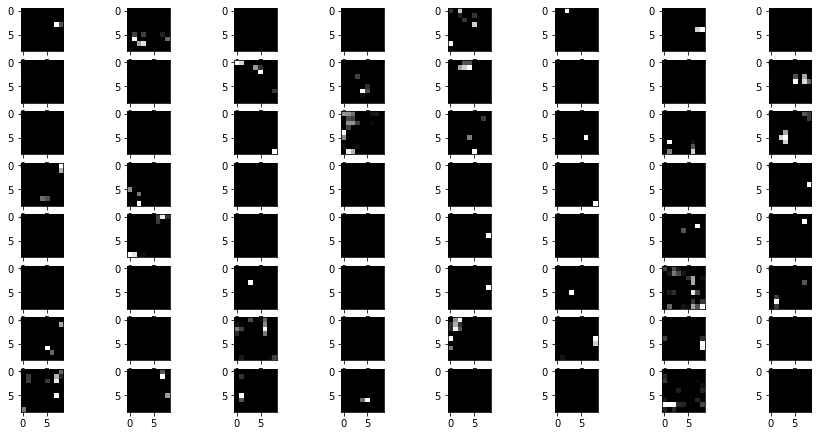

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0  

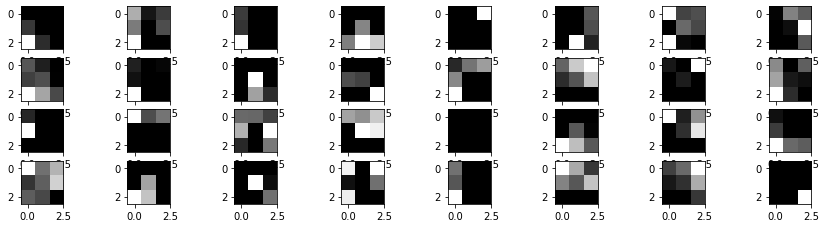





frog


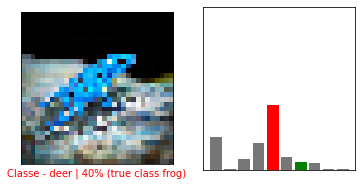

Classe - airplane | Confiança - 20.22 %
Classe - automobile | Confiança - 0.26 %
Classe - bird | Confiança - 6.65 %
Classe - cat | Confiança - 16.16 %
Classe - deer | Confiança - 39.7 %
Classe - dog | Confiança - 7.9 %
Classe - frog | Confiança - 4.66 %
Classe - horse | Confiança - 3.84 %
Classe - ship | Confiança - 0.42 %
Classe - truck | Confiança - 0.18 %
Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
Total params: 24,704
Trainable params: 24,704
Non-trainable params: 0
_________________________________________________________________
Ativação na 1° camada


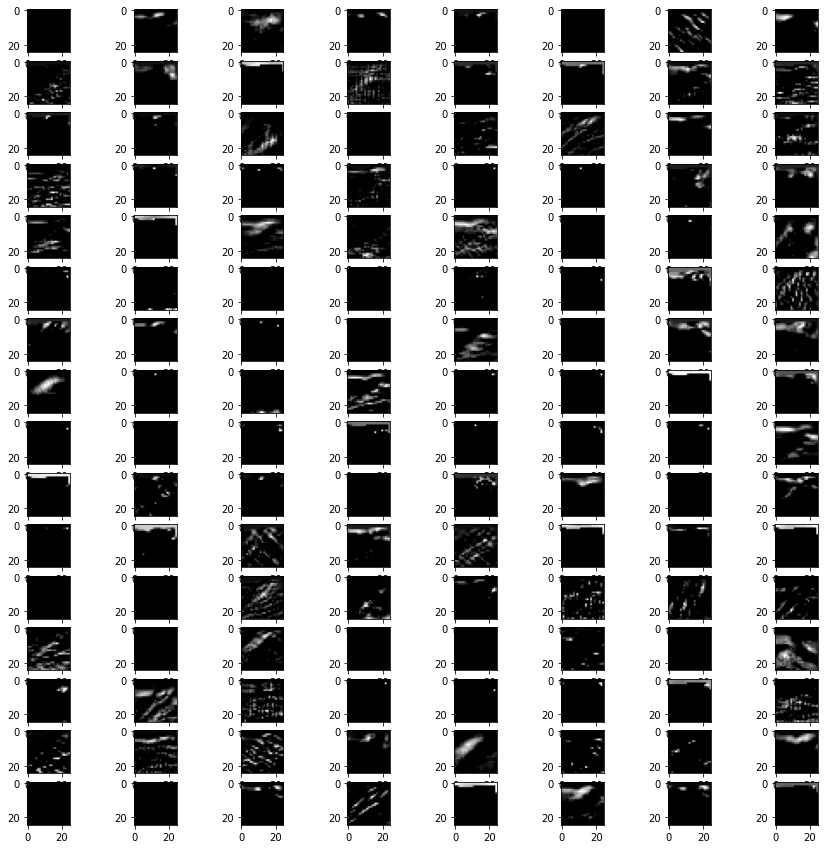

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
Total params: 155,840
Trainable params: 155,840
Non-trainable params: 0
_________________________________________________________________
Ativação na 4° camada


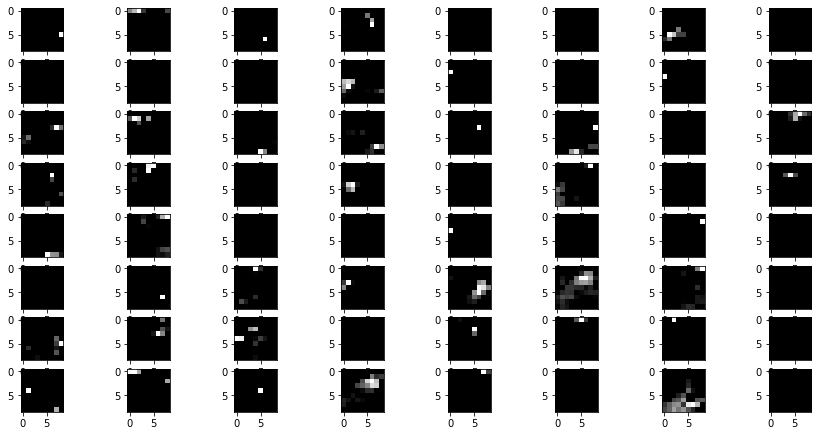

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0  

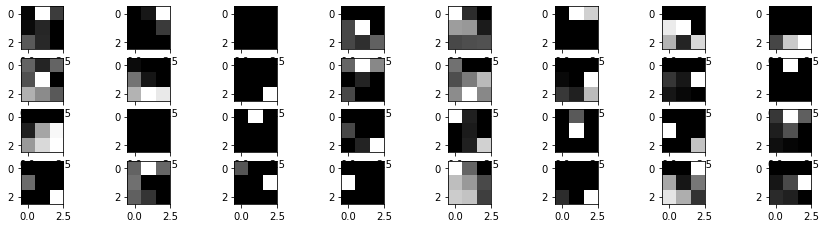





horse


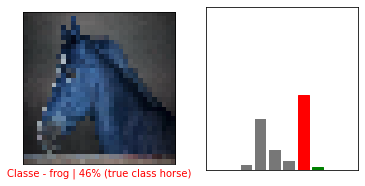

Classe - airplane | Confiança - 0.05 %
Classe - automobile | Confiança - 0.04 %
Classe - bird | Confiança - 3.03 %
Classe - cat | Confiança - 31.38 %
Classe - deer | Confiança - 12.27 %
Classe - dog | Confiança - 5.34 %
Classe - frog | Confiança - 45.95 %
Classe - horse | Confiança - 1.82 %
Classe - ship | Confiança - 0.03 %
Classe - truck | Confiança - 0.09 %
Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
Total params: 24,704
Trainable params: 24,704
Non-trainable params: 0
_________________________________________________________________
Ativação na 1° camada


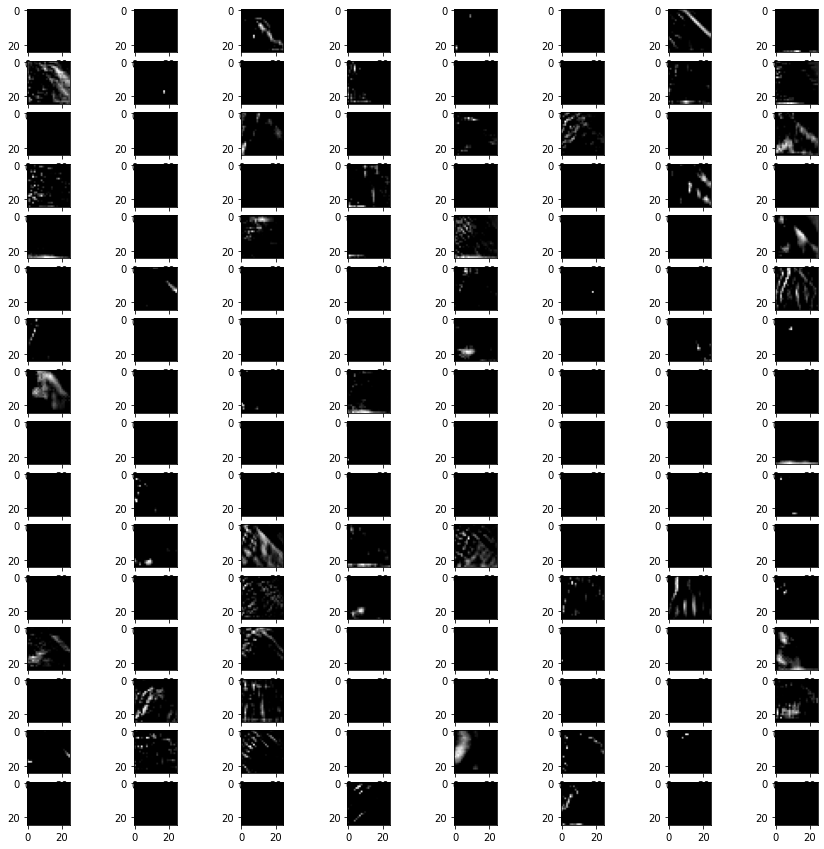

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
Total params: 155,840
Trainable params: 155,840
Non-trainable params: 0
_________________________________________________________________
Ativação na 4° camada


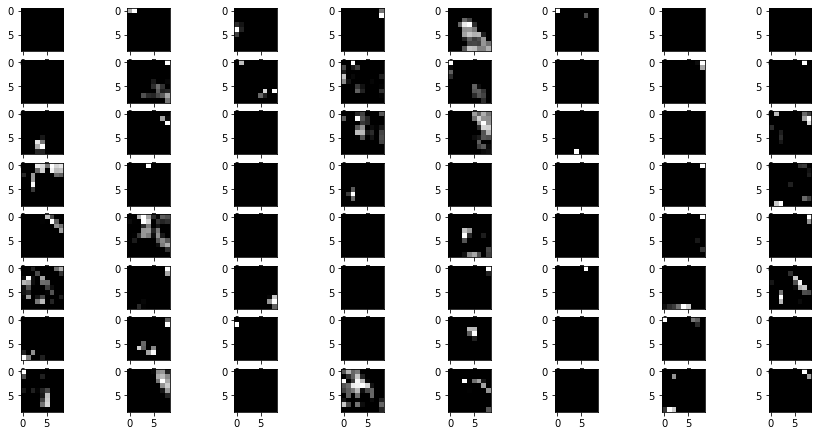

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0  

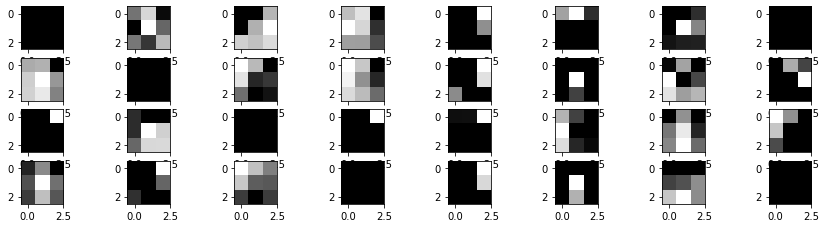





ship


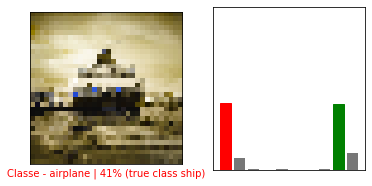

Classe - airplane | Confiança - 40.92 %
Classe - automobile | Confiança - 7.49 %
Classe - bird | Confiança - 0.48 %
Classe - cat | Confiança - 0.08 %
Classe - deer | Confiança - 0.49 %
Classe - dog | Confiança - 0.02 %
Classe - frog | Confiança - 0.03 %
Classe - horse | Confiança - 0.17 %
Classe - ship | Confiança - 40.06 %
Classe - truck | Confiança - 10.26 %
Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
Total params: 24,704
Trainable params: 24,704
Non-trainable params: 0
_________________________________________________________________
Ativação na 1° camada


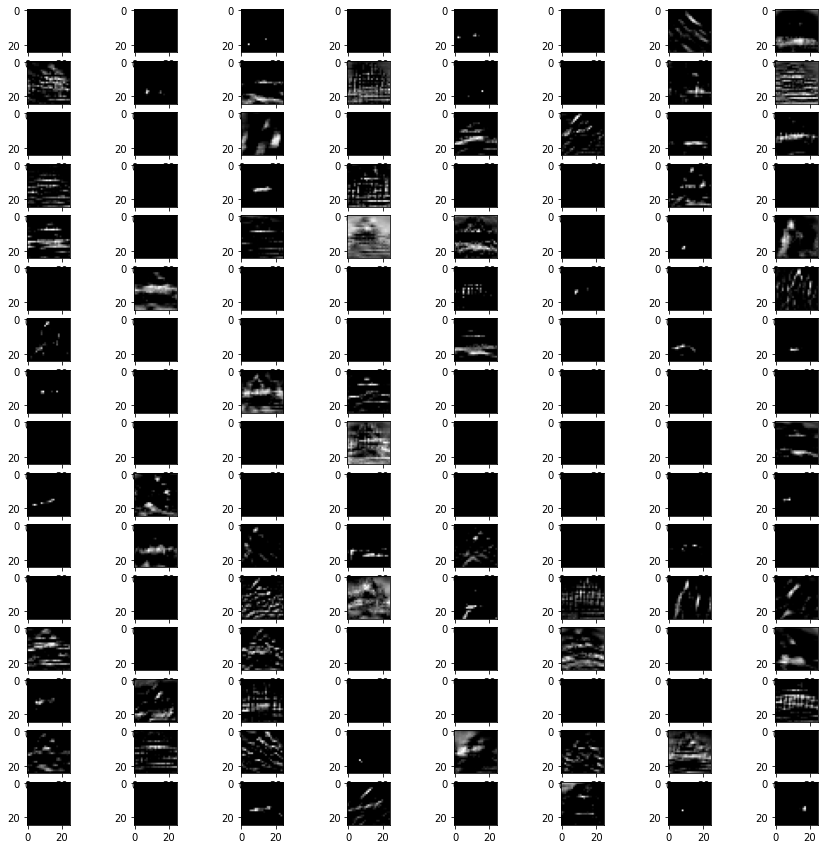

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
Total params: 155,840
Trainable params: 155,840
Non-trainable params: 0
_________________________________________________________________
Ativação na 4° camada


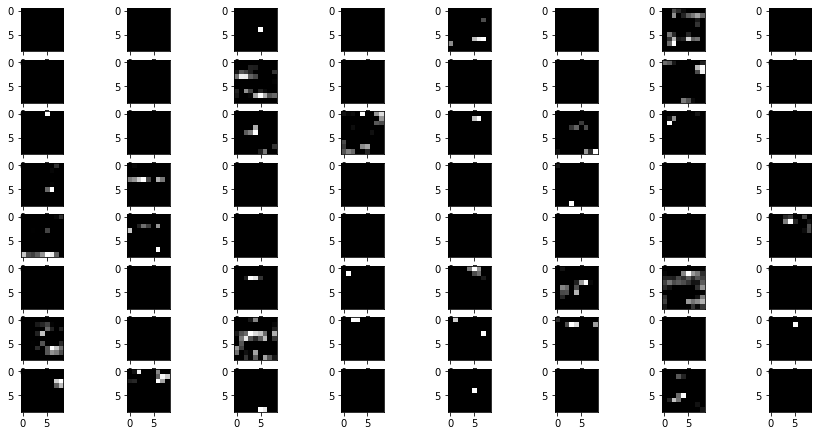

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0  

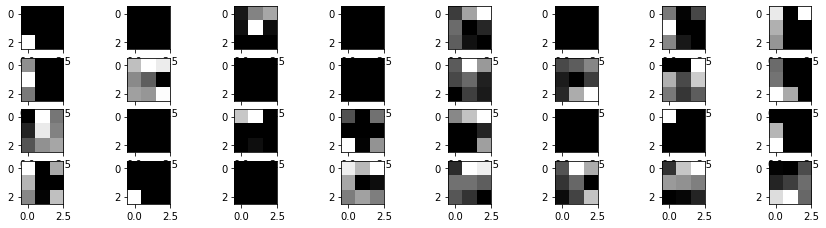





truck


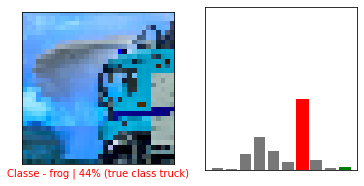

Classe - airplane | Confiança - 1.31 %
Classe - automobile | Confiança - 0.47 %
Classe - bird | Confiança - 9.58 %
Classe - cat | Confiança - 20.26 %
Classe - deer | Confiança - 11.49 %
Classe - dog | Confiança - 4.83 %
Classe - frog | Confiança - 43.51 %
Classe - horse | Confiança - 5.78 %
Classe - ship | Confiança - 0.96 %
Classe - truck | Confiança - 1.81 %
Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
Total params: 24,704
Trainable params: 24,704
Non-trainable params: 0
_________________________________________________________________
Ativação na 1° camada


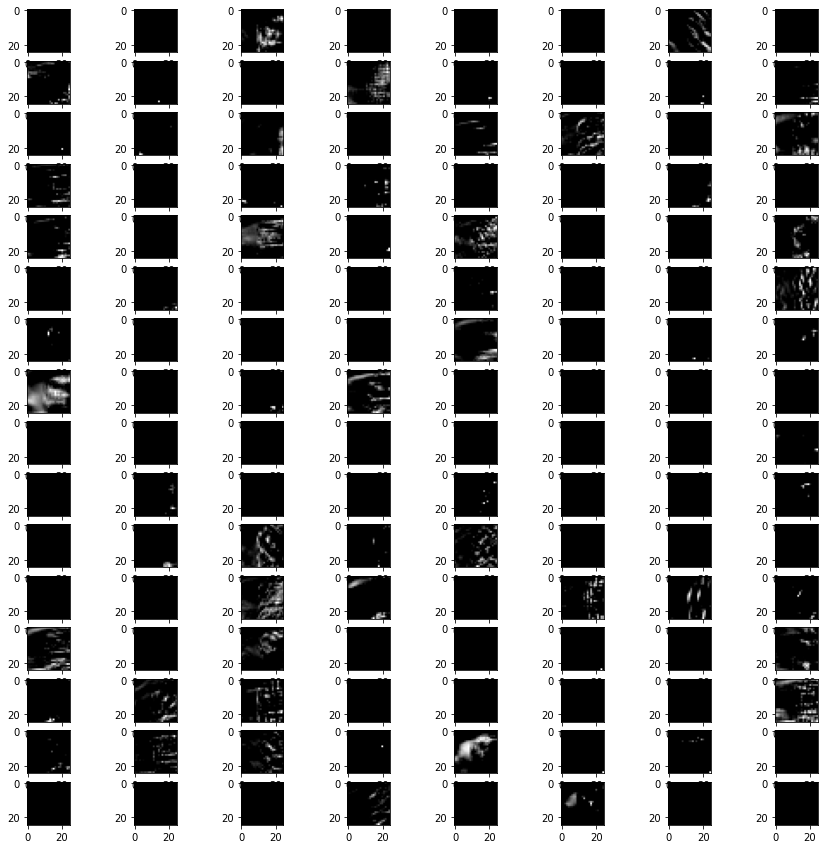

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
Total params: 155,840
Trainable params: 155,840
Non-trainable params: 0
_________________________________________________________________
Ativação na 4° camada


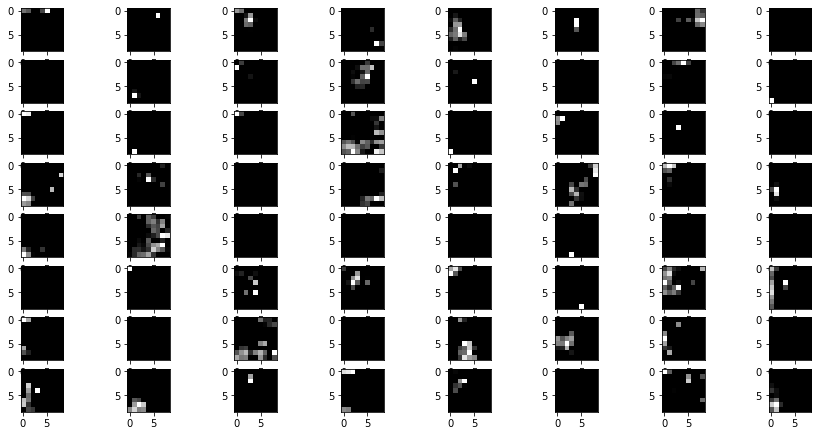

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       24704     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          131136    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0  

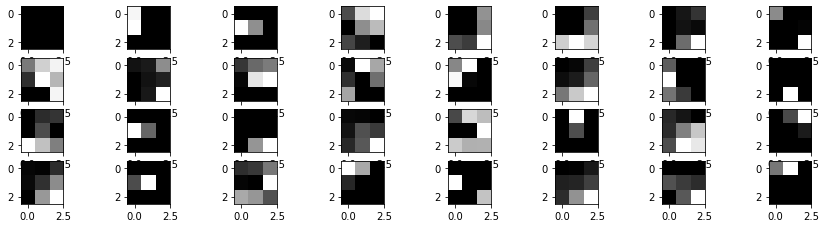

In [5]:
for category in CATEGORIES:

    true_label_num = CATEGORIES.index (category)
    
    DIR = TEST2_DIR+'/previsao '+'(' + category + ').'+formato
    
    xp, Xp = prepare(DIR)

    Xp=np.array(Xp/255.0)
       
    prediction = model.predict( Xp )
    
    prev = prediction[0]

    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)

    plot_image(prediction[0], true_label_num, xp)
    plt.subplot(1,2,2)
    plot_value_array(prediction[0],  true_label_num)
    plt.show()

    for i in range( len(prev) ):
        print( 'Classe - {} | Confiança - {} %'.format(CATEGORIES[i], np.round(prev[i]*100, 2) ) )

    inp = model.inputs 
    
    k=0
    for layer in model.layers:
        if 'conv' in layer.name: 
            fig= plt.figure(figsize=(15,15))
            out = layer.output
            feature_map = Model(inputs= inp, outputs= out)
            f = feature_map.predict(Xp)
              
            feature_map.summary()
            
            print('Ativação na {}° camada'.format(k+1))

            for i in range(f.shape[3]):

                p = f[0,:,:,i]

                ax = fig.add_subplot(16,8,i+1)
                ax.imshow(p, cmap='gray')

            plt.show()
        k=k+1
    print('\n\n\n')